In [2]:
from sklearn.ensemble import IsolationForest
import numpy as np
import random
from Data_import import data_frame
from model_evaluation import *
np.random.seed(1)
random.seed(1)

Data = data_frame()
X = Data.unlabeled_data_v_r
clf = IsolationForest(random_state=0).fit(X)
for count_imbalance, beta_imbalance in enumerate(np.array([800])):
    index = Data.calm_ratios.index(beta_imbalance)
    calm_test_x = Data.calm_test_generator(calm_ratio_index=index)
    test_x = np.vstack((calm_test_x, Data.pilot_test_v_r))
    test_y = np.hstack((np.zeros(calm_test_x.shape[0])+1, np.zeros(Data.pilot_test_v_r.shape[0]) - 1))
    test_predict = clf.decision_function(test_x)
    test_pred = clf.predict(test_x)
    
    test_y_ordered = np.hstack((np.zeros(calm_test_x.shape[0]), np.zeros(Data.pilot_test_v_r.shape[0]) + 1))#[0,1]
    test_predict_ordered = -test_predict
    AUC, _ = calculate_metrics(decision_values = test_predict_ordered, truth = test_y_ordered, hazard_id = 1)
    print(f"=====================beta_imbalance = {beta_imbalance}=====================")    
    print(f'AUC:{AUC}')

=====================beta_imbalance = 800=====================
AUC:0.8741768035079541


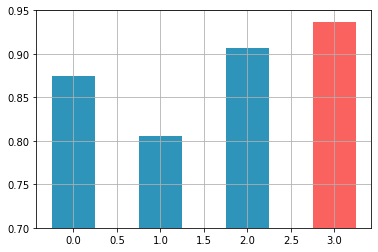

In [18]:
import matplotlib.pyplot as plt
y = [0.87417,0.806,0.90647,0.937]
x = np.arange(4)
plt.bar(x,y,width = 0.5,color='#2E94B9')
plt.bar(3,0.937,width = 0.5,color='#fa625f')
plt.grid('True')
plt.box('False')
plt.ylim((0.7,0.95))
plt.savefig(f'../figures/quantitative_cmp.pdf')